In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

## Obtención y limpieza de los datos

### Importación de los datos

In [2]:
# Importamos los datos a un DataFrame
file = './data/heart_failure_clinical_records_dataset.csv'
data = pd.read_csv(file, delimiter=',')

In [3]:
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


### Limpieza de los datos

In [4]:
# Miramos que todas las columnas nos aporten información
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


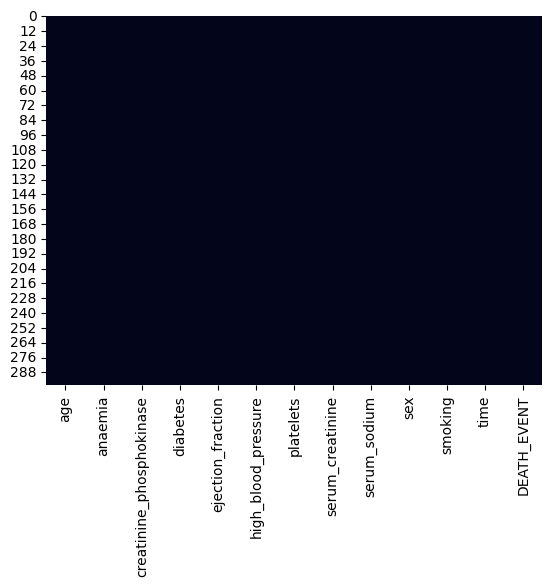

In [7]:
# Miramos si tenemos algun null o NaN o none
sns.heatmap(data.isnull(), cbar=False);

En este caso todas las columnas nos aportan información, por lo tanto, no podemos eliminar ninguna. Tampoco se observan valores nulos pero al tratarse de datos cientificos tenemos que asegurarnos que el rango de valores de cada una de las variables sea científicamente posible.

- ejection_fraction: Los casos en los que la fracción de ejecución son menores al 35% indican que el paciente una disfunción severa del ventrículo izquierdo. Aquellos casos donde la fracción sea menor al 20% se consideran incorrectos ya que son extremadamente bajos. Como consecuencia, se imputan al mínimo. 

In [8]:
data['ejection_fraction'] = data['ejection_fraction'].apply(lambda x: 20 if x<20 else x)

### Arreglamos los datos

In [9]:
# Modificamos el nombre de las columnas para que el DataFrame sea más entendible
data.columns = ['Age','HasAnaemia','CPK','HasDiabetes','EjectionFraction','HasHypertension','Platelets',
    'SerumCreatinine', 'SerumSodium', 'Gender', 'Smoking', 'Follow-up','PatientDeceased']

In [10]:
# Cambiamos cada número de la columna 'Sex' por su correspondiente valor
data.Gender = data.Gender.apply(lambda x: 'female' if x == 0 else 'male')

In [11]:
# Especificamos correctamente el tipo de valor de las columnas
data = data.astype({'Age': 'int64', 'Platelets': 'int64', 'HasAnaemia': 'bool', 'HasDiabetes': 'bool', 'HasHypertension': 'bool', 
    'Smoking': 'bool','PatientDeceased': 'bool'})

In [12]:
data

,Age,HasAnaemia,CPK,HasDiabetes,EjectionFraction,HasHypertension,Platelets,SerumCreatinine,SerumSodium,Gender,Smoking,Follow-up,PatientDeceased
0,75,False,582,False,20,True,265000,1.9,130,male,False,4,True
1,55,False,7861,False,38,False,263358,1.1,136,male,False,6,True
2,65,False,146,False,20,False,162000,1.3,129,male,True,7,True
3,50,True,111,False,20,False,210000,1.9,137,male,False,7,True
4,65,True,160,True,20,False,327000,2.7,116,female,False,8,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62,False,61,True,38,True,155000,1.1,143,male,True,270,False
295,55,False,1820,False,38,False,270000,1.2,139,female,False,271,False
296,45,False,2060,True,60,False,742000,0.8,138,female,False,278,False
297,45,False,2413,False,38,False,140000,1.4,140,male,True,280,False


## Información basica de los datos

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               299 non-null    int64  
 1   HasAnaemia        299 non-null    bool   
 2   CPK               299 non-null    int64  
 3   HasDiabetes       299 non-null    bool   
 4   EjectionFraction  299 non-null    int64  
 5   HasHypertension   299 non-null    bool   
 6   Platelets         299 non-null    int64  
 7   SerumCreatinine   299 non-null    float64
 8   SerumSodium       299 non-null    int64  
 9   Gender            299 non-null    object 
 10  Smoking           299 non-null    bool   
 11  Follow-up         299 non-null    int64  
 12  PatientDeceased   299 non-null    bool   
dtypes: bool(5), float64(1), int64(6), object(1)
memory usage: 20.3+ KB


In [14]:
data.describe()

,Age,CPK,EjectionFraction,Platelets,SerumCreatinine,SerumSodium,Follow-up
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,60.829431,581.839465,38.157191,263358.026756,1.39388,136.625418,130.260870
std,11.894997,970.287881,11.706364,97804.236869,1.03451,4.412477,77.614208
min,40.000000,23.000000,20.000000,25100.000000,0.50000,113.000000,4.000000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000,73.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000,115.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000,203.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000,285.000000


/var/folders/2l/vvs13szs5gxbhbsk5mznxk800000gn/T/ipykernel_833/742587894.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), vmin = -2, vmax = +1, annot = True, cmap = 'coolwarm')


<AxesSubplot: >

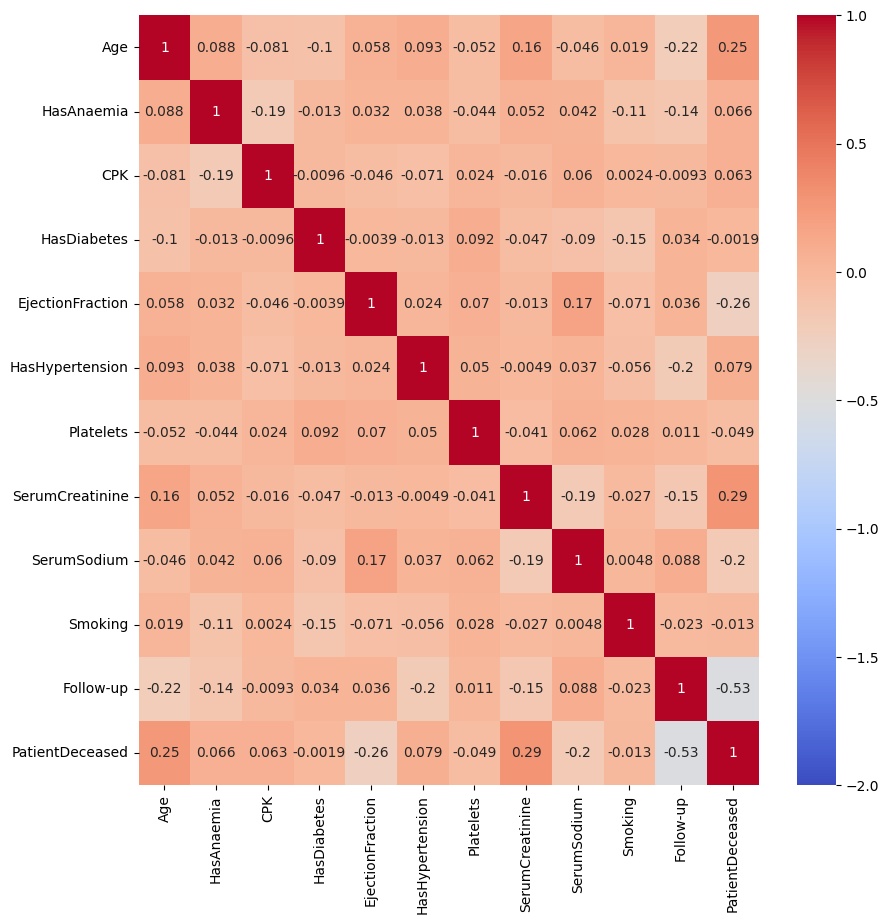

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), vmin = -2, vmax = +1, annot = True, cmap = 'coolwarm')

## Descripción estadística de los datos

Las funciones que se utilizarán para determinar las medidas de tendencia central y variabilidad de las columnas con valores del tipo entero y real con coma flotante son las siguientes.

In [15]:
# MEDIDAS DE TENDENCIA CENTRAL
def med_tend_central(valores):
    media = np.mean(valores)
    mediana = np.median(valores)
    print(f'MEDIDAS DE TENCENCIA CENTRAL:\nMedia = {media}\nMediana = {mediana}')

# MEDIDAS DE VARIABILIDAD
def med_var(valores):
    desvest = np.std(valores) 
    percentil25 = np.percentile(valores, 25)
    percentil75 = np.percentile(valores, 75)
    print(f'MEDIDAS DE VARIABILIDAD:\nDesviación estándar = {desvest}\nRango intercuatílico = {percentil75-percentil25}')

### Edad

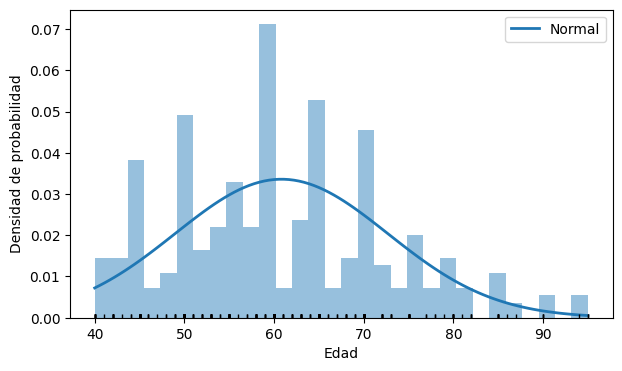

In [16]:
# Valores de la media (mu) y desviación típica (sigma) de los datos
mu, sigma = stats.norm.fit(data['Age'])

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(np.min(data['Age']), np.max(data['Age']), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='Normal')
ax.hist(x=data['Age'], density=True, bins=30, color="#3182bd", alpha=0.5)
ax.plot(data['Age'], np.full_like(data['Age'], -0.01), '|k', markeredgewidth=1)
ax.set_xlabel('Edad')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

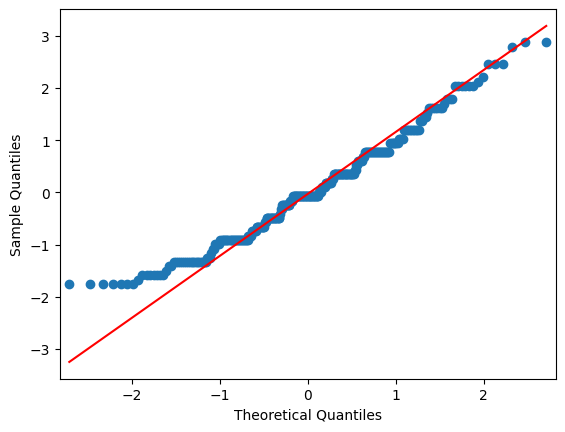

In [79]:
# Miramos si sigue una distribución normal
sm.qqplot(data['Age'],fit=True,line='q');

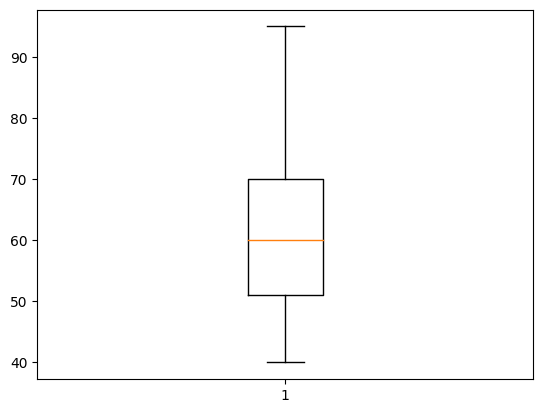

In [66]:
plt.boxplot(data['Age'])
plt.show()

In [67]:
med_tend_central(data.Age)
med_var(data.Age)

MEDIDAS DE TENCENCIA CENTRAL:
Media = 60.82943143812709
Mediana = 60.0
MEDIDAS DE VARIABILIDAD:
Desviación estándar = 11.875088593697965
Rango intercuatílico = 19.0


### Pacientes con anemia

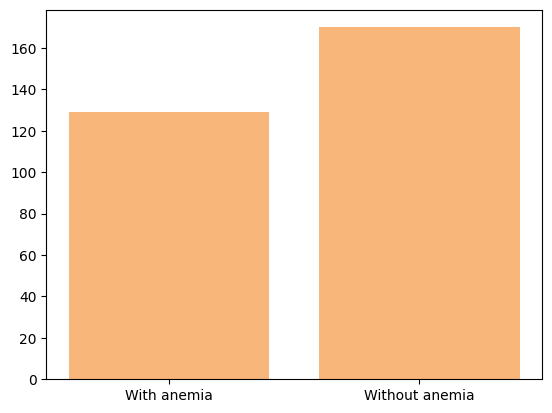

In [80]:
v = int(data['HasAnaemia'][data['HasAnaemia'] == True].value_counts())
f = int(data['HasAnaemia'][data['HasAnaemia'] == False].value_counts())

height = [v,f]
bars = ('With anemia','Without anemia')
y_pos = np.arange(len(bars))
# Create bars
plt.bar(y_pos, height, color = '#F9B67B')
# Create names on the x-axis
plt.xticks(y_pos, bars)
# Show graphic
plt.show()

In [81]:
print(f'True : {v*100/(v+f)}%\nFalse : {f*100/(v+f)}%')

True : 43.1438127090301%
False : 56.8561872909699%


### Nivel de la enzima CPK en la sangre

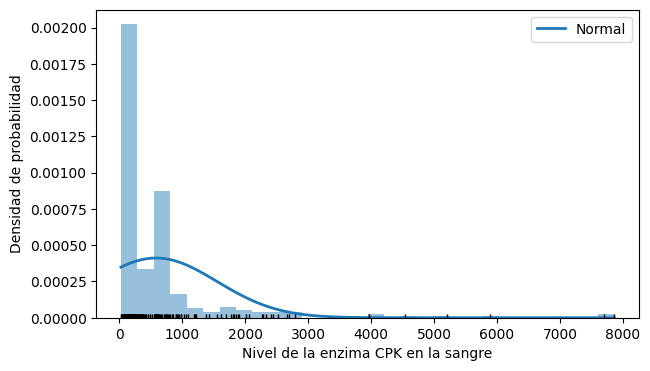

In [82]:
# Valores de la media (mu) y desviación típica (sigma) de los datos
mu, sigma = stats.norm.fit(data['CPK'])

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(np.min(data['CPK']), np.max(data['CPK']), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='Normal')
ax.hist(x=data['CPK'], density=True, bins=30, color="#3182bd", alpha=0.5)
ax.plot(data['CPK'], np.full_like(data['CPK'], -0.01), '|k', markeredgewidth=1)
ax.set_xlabel('Nivel de la enzima CPK en la sangre')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

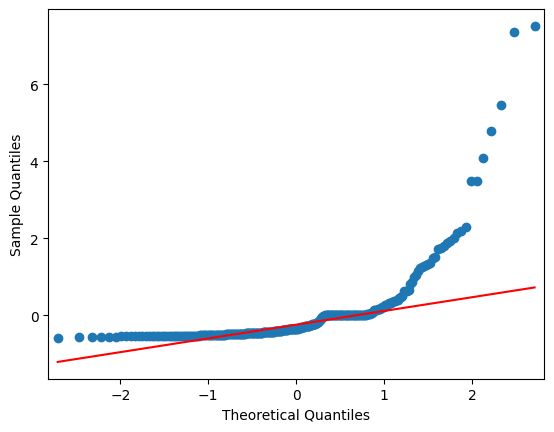

In [83]:
# Miramos si sigue una distribución normal
sm.qqplot(data['CPK'],fit=True,line='q');

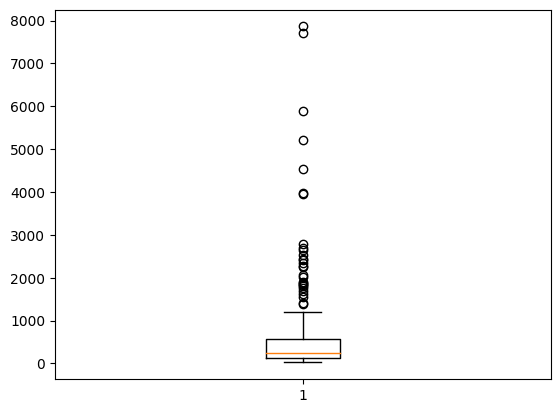

In [84]:
plt.boxplot(data['CPK'])
plt.show()

In [85]:
med_tend_central(data.CPK)
med_var(data.CPK)

MEDIDAS DE TENCENCIA CENTRAL:
Media = 581.8394648829432
Mediana = 250.0
MEDIDAS DE VARIABILIDAD:
Desviación estándar = 968.6639668032415
Rango intercuatílico = 465.5


### Pacientes con diabetes

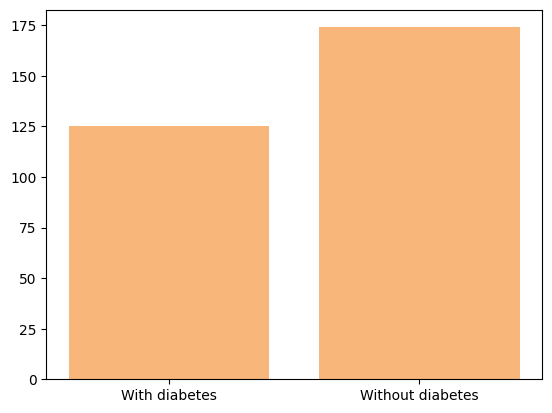

In [86]:
v = int(data['HasDiabetes'][data['HasDiabetes'] == True].value_counts())
f = int(data['HasDiabetes'][data['HasDiabetes'] == False].value_counts())

height = [v,f]
bars = ('With diabetes','Without diabetes')
y_pos = np.arange(len(bars))
# Create bars
plt.bar(y_pos, height, color = '#F9B67B')
# Create names on the x-axis
plt.xticks(y_pos, bars)
# Show graphic
plt.show()

In [87]:
print(f'True : {v*100/(v+f)}%\nFalse : {f*100/(v+f)}%')

True : 41.80602006688963%
False : 58.19397993311037%


### Porcentaje de sangre que sale del corazón en cada contracción

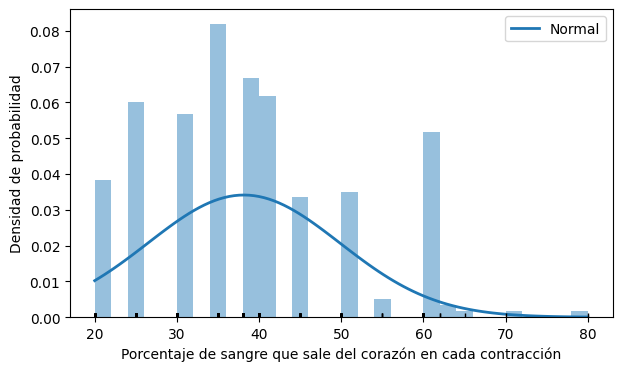

In [88]:
# Valores de la media (mu) y desviación típica (sigma) de los datos
mu, sigma = stats.norm.fit(data['EjectionFraction'])

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(np.min(data['EjectionFraction']), np.max(data['EjectionFraction']), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='Normal')
ax.hist(x=data['EjectionFraction'], density=True, bins=30, color="#3182bd", alpha=0.5)
ax.plot(data['EjectionFraction'], np.full_like(data['EjectionFraction'], -0.01), '|k', markeredgewidth=1)
ax.set_xlabel('Porcentaje de sangre que sale del corazón en cada contracción')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

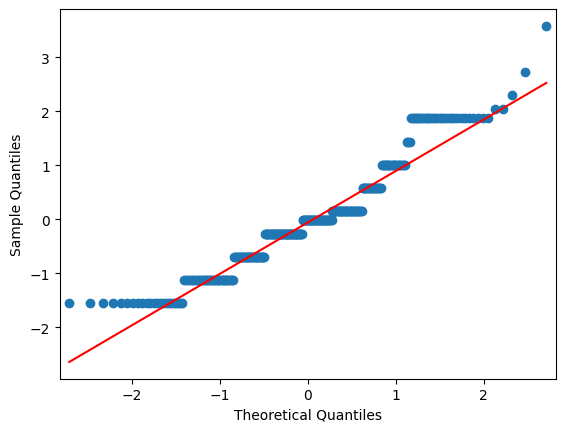

In [89]:
# Miramos si sigue una distribución normal
sm.qqplot(data['EjectionFraction'],fit=True,line='q');

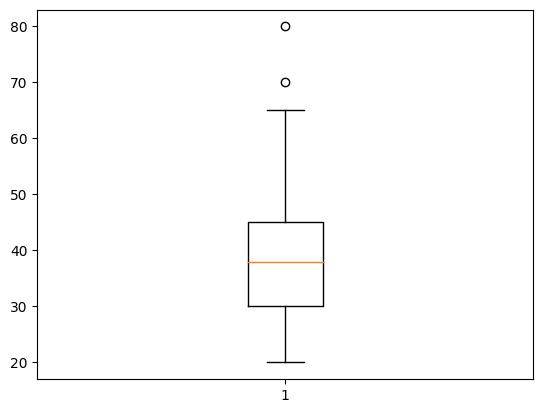

In [91]:
plt.boxplot(data['EjectionFraction'])
plt.show()

In [92]:
med_tend_central(data.EjectionFraction)
med_var(data.EjectionFraction)

MEDIDAS DE TENCENCIA CENTRAL:
Media = 38.15719063545151
Mediana = 38.0
MEDIDAS DE VARIABILIDAD:
Desviación estándar = 11.68677210673225
Rango intercuatílico = 15.0


### Pacientes con hipertensión

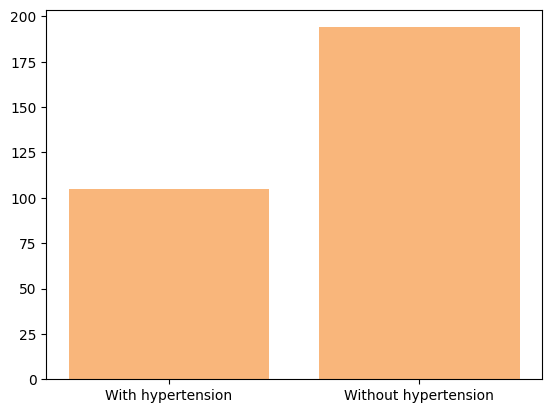

In [93]:
v = int(data['HasHypertension'][data['HasHypertension'] == True].value_counts())
f = int(data['HasHypertension'][data['HasHypertension'] == False].value_counts())

height = [v,f]
bars = ('With hypertension','Without hypertension')
y_pos = np.arange(len(bars))
# Create bars
plt.bar(y_pos, height, color = '#F9B67B')
# Create names on the x-axis
plt.xticks(y_pos, bars)
# Show graphic
plt.show()

In [94]:
print(f'True : {v*100/(v+f)}%\nFalse : {f*100/(v+f)}%')

True : 35.11705685618729%
False : 64.88294314381271%


### Plaquetas en la sangre

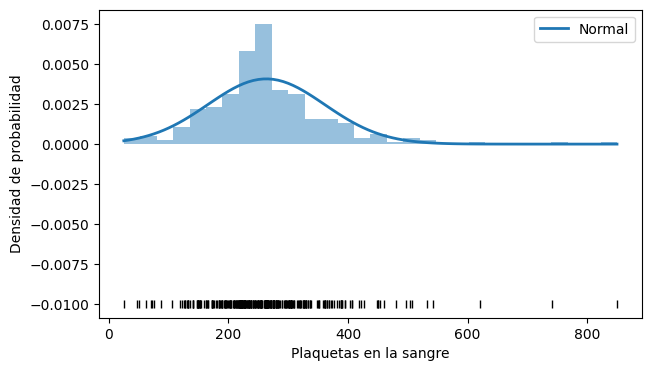

In [96]:
# Para poder ver la distribución quitamos 3 ceros a todos los valores ya que hay mucha diferencia entre el alor mínima y el máximo.

# Valores de la media (mu) y desviación típica (sigma) de los datos
mu, sigma = stats.norm.fit((data['Platelets'])/1000)

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(np.min((data['Platelets'])/1000), np.max((data['Platelets'])/1000), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='Normal')
ax.hist(x=(data['Platelets'])/1000, density=True, bins=30, color="#3182bd", alpha=0.5)
ax.plot((data['Platelets'])/1000, np.full_like((data['Platelets'])/1000, -0.01), '|k', markeredgewidth=1)
ax.set_xlabel('Plaquetas en la sangre')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

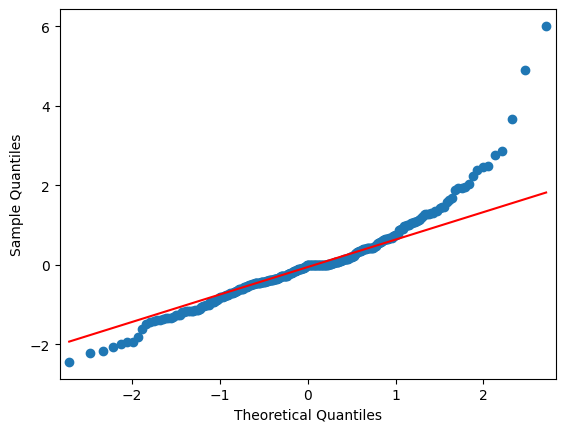

In [95]:
# Miramos si sigue una distribución normal
sm.qqplot(data['Platelets'],fit=True,line='q');

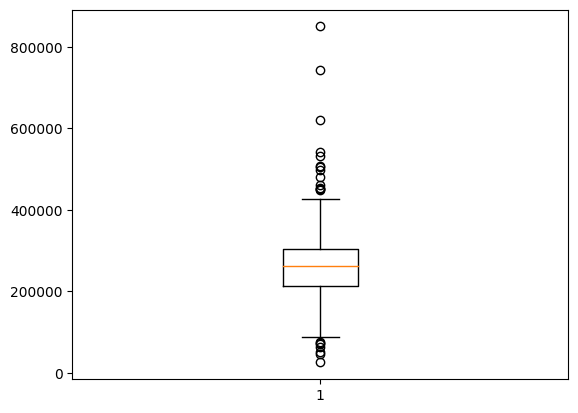

In [97]:
plt.boxplot(data['Platelets'])
plt.show()

In [98]:
med_tend_central(data.Platelets)
med_var(data.Platelets)

MEDIDAS DE TENCENCIA CENTRAL:
Media = 263358.02675585286
Mediana = 262000.0
MEDIDAS DE VARIABILIDAD:
Desviación estándar = 97640.54765451458
Rango intercuatílico = 91000.0


### Nivel de creatinina sérica en la sangre

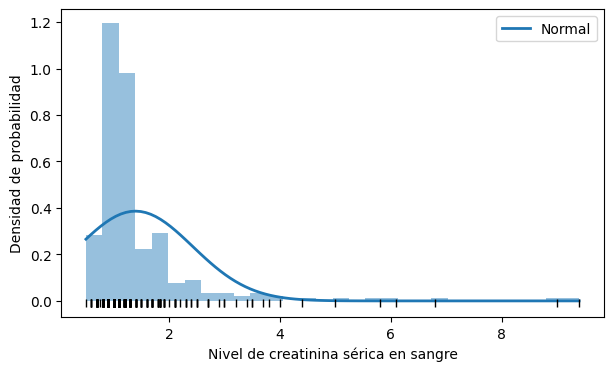

In [99]:
# Valores de la media (mu) y desviación típica (sigma) de los datos
mu, sigma = stats.norm.fit(data['SerumCreatinine'])

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(np.min(data['SerumCreatinine']), np.max(data['SerumCreatinine']), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='Normal')
ax.hist(x=data['SerumCreatinine'], density=True, bins=30, color="#3182bd", alpha=0.5)
ax.plot(data['SerumCreatinine'], np.full_like(data['SerumCreatinine'], -0.01), '|k', markeredgewidth=1)
ax.set_xlabel('Nivel de creatinina sérica en sangre')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

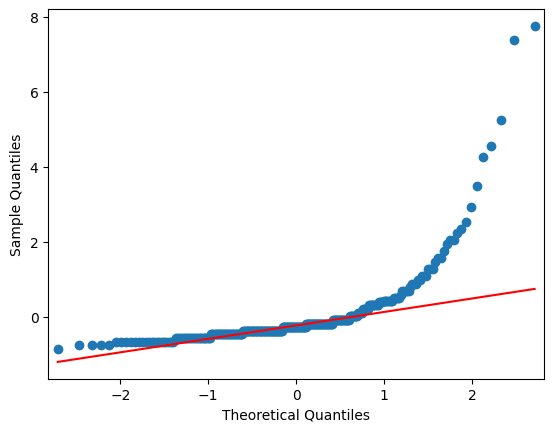

In [100]:
# Miramos si sigue una distribución normal
sm.qqplot(data['SerumCreatinine'],fit=True,line='q');

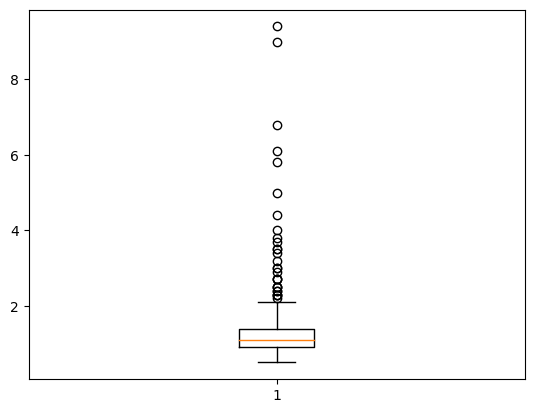

In [101]:
plt.boxplot((data['SerumCreatinine']))
plt.show()

In [102]:
med_tend_central(data.SerumCreatinine)
med_var(data.SerumCreatinine)

MEDIDAS DE TENCENCIA CENTRAL:
Media = 1.3938795986622072
Mediana = 1.1
MEDIDAS DE VARIABILIDAD:
Desviación estándar = 1.0327786652795918
Rango intercuatílico = 0.4999999999999999


### Nivel de sodio sérico en la sangre

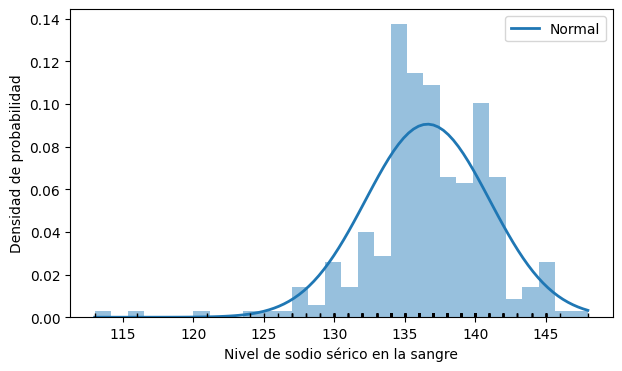

In [103]:
# Valores de la media (mu) y desviación típica (sigma) de los datos
mu, sigma = stats.norm.fit(data['SerumSodium'])

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(np.min(data['SerumSodium']), np.max(data['SerumSodium']), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='Normal')
ax.hist(x=data['SerumSodium'], density=True, bins=30, color="#3182bd", alpha=0.5)
ax.plot(data['SerumSodium'], np.full_like(data['SerumSodium'], -0.01), '|k', markeredgewidth=1)
ax.set_xlabel('Nivel de sodio sérico en la sangre')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

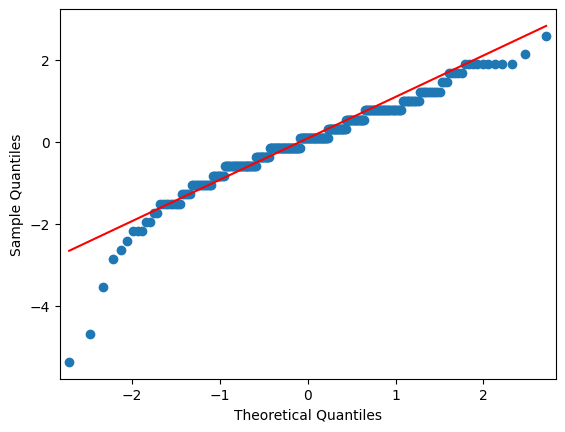

In [104]:
# Miramos si sigue una distribución normal
sm.qqplot(data['SerumSodium'],fit=True,line='q');

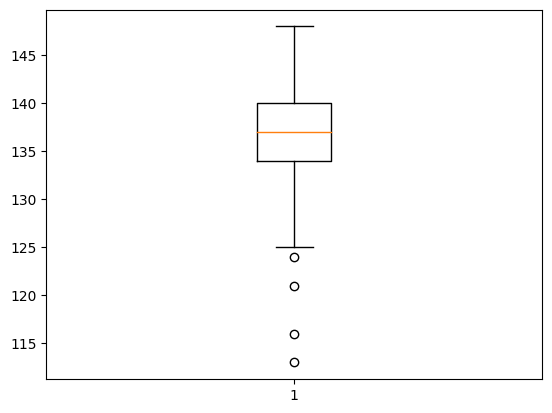

In [105]:
plt.boxplot(data['SerumSodium'])
plt.show()

In [107]:
med_tend_central(data.SerumSodium)
med_var(data.SerumSodium)

MEDIDAS DE TENCENCIA CENTRAL:
Media = 136.62541806020067
Mediana = 137.0
MEDIDAS DE VARIABILIDAD:
Desviación estándar = 4.405092379513557
Rango intercuatílico = 6.0


### Género

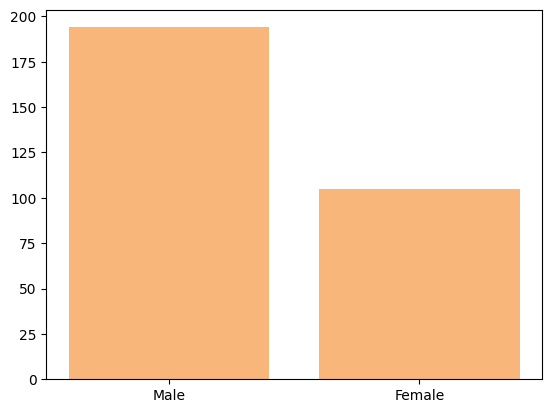

In [108]:
m = int(data['Gender'][data['Gender'] == 'male'].value_counts())
f = int(data['Gender'][data['Gender'] == 'female'].value_counts())

height = [m,f]
bars = ('Male','Female')
y_pos = np.arange(len(bars))
# Create bars
plt.bar(y_pos, height, color = '#F9B67B')
# Create names on the x-axis
plt.xticks(y_pos, bars)
# Show graphic
plt.show()

In [70]:
print(f'Male : {m*100/(m+f)}%\nFemale : {f*100/(m+f)}%')

Male : 64.88294314381271%
Female : 35.11705685618729%


### Pacientes fumadores

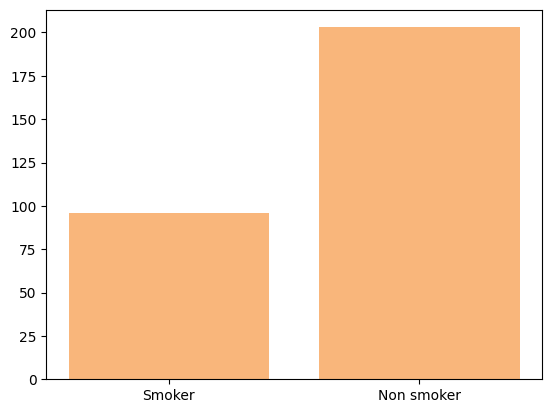

In [109]:
v = int(data['Smoking'][data['Smoking'] == True].value_counts())
f = int(data['Smoking'][data['Smoking'] == False].value_counts())

height = [v,f]
bars = ('Smoker','Non smoker')
y_pos = np.arange(len(bars))
# Create bars
plt.bar(y_pos, height, color = '#F9B67B')
# Create names on the x-axis
plt.xticks(y_pos, bars)
# Show graphic
plt.show()

In [110]:
print(f'Smoker : {v*100/(v+f)}%\nNon smoker : {f*100/(v+f)}%')

Smoker : 32.10702341137124%
Non smoker : 67.89297658862876%


### Días de seguimiento

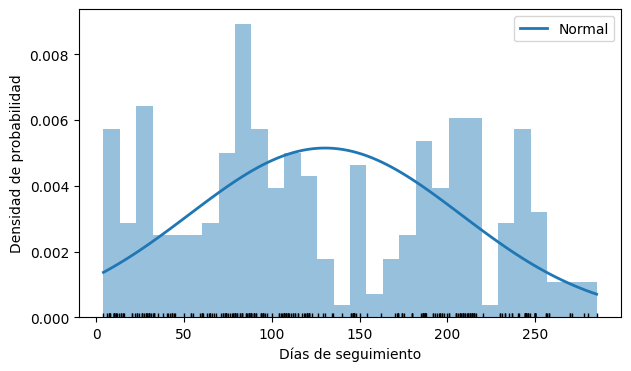

In [111]:
# Valores de la media (mu) y desviación típica (sigma) de los datos
mu, sigma = stats.norm.fit(data['Follow-up'])

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(np.min(data['Follow-up']), np.max(data['Follow-up']), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='Normal')
ax.hist(x=data['Follow-up'], density=True, bins=30, color="#3182bd", alpha=0.5)
ax.plot(data['Follow-up'], np.full_like(data['Follow-up'], -0.01), '|k', markeredgewidth=1)
ax.set_xlabel('Días de seguimiento')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

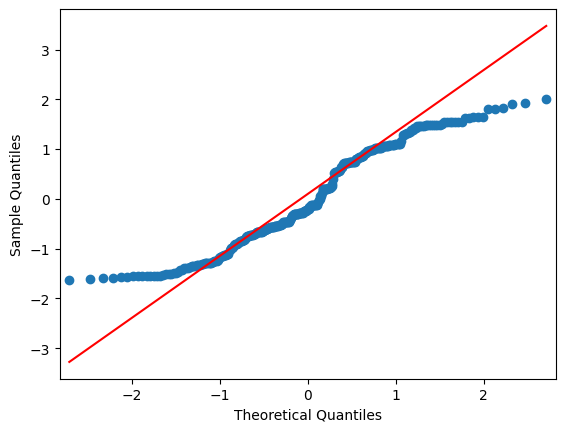

In [112]:
# Miramos si sigue una distribución normal
sm.qqplot(data['Follow-up'],fit=True,line='q');

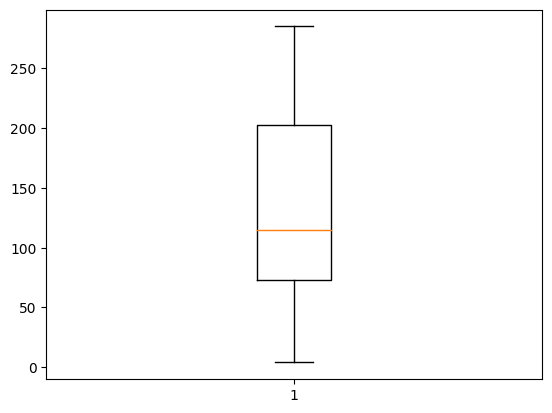

In [113]:
plt.boxplot(data['Follow-up'])
plt.show()

In [114]:
med_tend_central(data['Follow-up'])
med_var(data['Follow-up'])

MEDIDAS DE TENCENCIA CENTRAL:
Media = 130.2608695652174
Mediana = 115.0
MEDIDAS DE VARIABILIDAD:
Desviación estándar = 77.48430960326975
Rango intercuatílico = 130.0


### Pacientes fallecidos

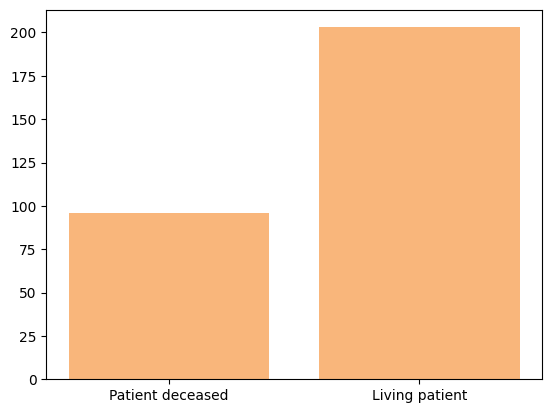

In [118]:
v = int(data['PatientDeceased'][data['PatientDeceased'] == True].value_counts())
f = int(data['PatientDeceased'][data['PatientDeceased'] == False].value_counts())

height = [v,f]
bars = ('Patient deceased','Living patient')
y_pos = np.arange(len(bars))
# Create bars
plt.bar(y_pos, height, color = '#F9B67B')
# Create names on the x-axis
plt.xticks(y_pos, bars)
# Show graphic
plt.show()

In [119]:
print(f'Patient deceased : {v*100/(v+f)}%\nLiving patient : {f*100/(v+f)}%')

Patient deceased : 32.10702341137124%
Living patient : 67.89297658862876%


## Feature engineering

### Plaquetas en la sangre
Para estudiar la relación que tiene el número de plaquetas con la probabilidad de sufrir una insuficiencia cardíaca, es más oportuno ver la relación que hay si el paciente puede sufrir hemorragia espontaneas (valores inferiores), si está dentro del rango normal o tiende a formar coágulos que desencadenan una trombosis o un infarto (valores superiores). Para ello se crea una nueva columna que indica el síntoma del paciente según su número de plaquetas en la sangre. 

In [20]:
for x in data['Platelets']:
    if x<150000:
        data['PlateletSymptoms'] = 'hemorragia'
    elif 150000<x<450000:
        data['PlateletSymptoms'] = 'normalidad'
    else:
        data['PlateletSymptoms'] = 'coágulos'


In [25]:
data[data['PlateletSymptoms'] == 'coágulos']

,Age,HasAnaemia,CPK,HasDiabetes,EjectionFraction,HasHypertension,Platelets,SerumCreatinine,SerumSodium,Gender,Smoking,Follow-up,PatientDeceased,PlateletSymptoms


### Nivel de creatinina sérica en la sangre
Los valores de creatinina sérica pueden encontrarse por encima del rango normal, pero en caso de que superen los 4 mg/dL indica un fallo renal. Como esta variable tiene varios valores que superan los 4 mg/dL, se ha optado a crear una nueva columna que indique que pacientes padecen un fallo renal para poder hacer un análisis bivariante más conveniente.

In [20]:
data['KidneyFailure'] = data['SerumCreatinine'].apply(lambda x: True if x>=4 else False)

## Análisis bivariante

### Pacientes con anemia

1. Las mujeres tienen más probabilidad de tener anemia.
2. Los pacientes que tienen anemia es más probable que sufran de un paro cardíaco.

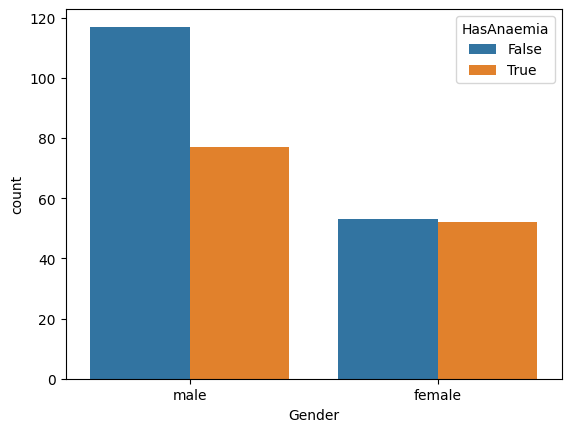

In [120]:
# 1
sns.countplot(x ='Gender', hue = "HasAnaemia", data = data)
plt.show()

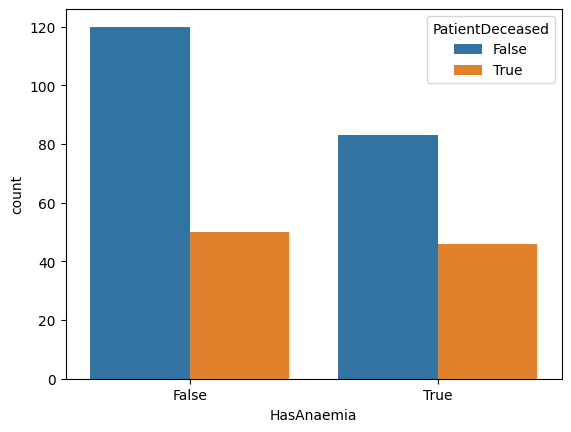

In [122]:
# 2
sns.countplot(x ='HasAnaemia', hue = "PatientDeceased", data = data)
plt.show()

### Nivel de la enzima CPK en la sangre

1. Los hombres tienen un mayor nivel de enzima CPK.
2. Como mayor es el nivel de CPK, mayor probabilidad de paro cardíaco.

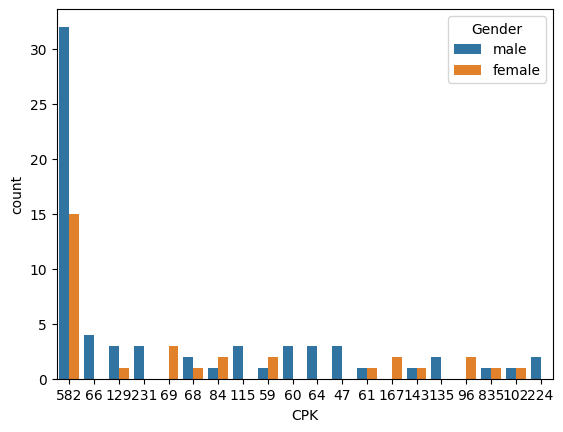

In [18]:
# 1
#sns.displot(data, x="CPK", hue="Gender", kind="kde", fill=True)
sns.countplot(x ='CPK', hue = "Gender", data=data, order= data['CPK'].value_counts().index[0:20])
plt.show()

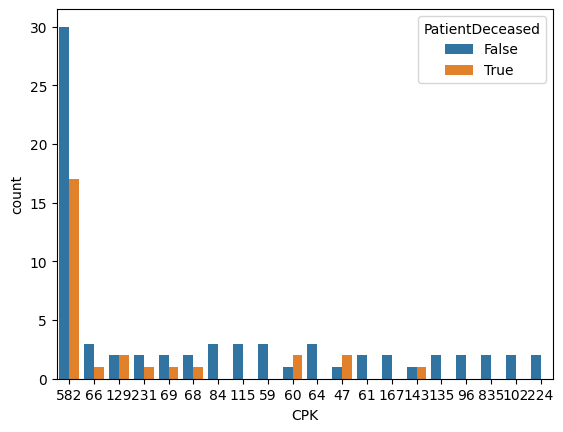

In [19]:
# 2
#sns.displot(data, x="CPK", hue="PatientDeceased", kind="kde", fill=True)
sns.countplot(x ='CPK', hue = "PatientDeceased", data=data, order= data['CPK'].value_counts().index[0:20])
plt.show()

### Pacientes con diabetes

1. Las mujeres tienen mayor probabilidad de tener diabetes.
2. Sufren antes un paro cardíaco los pacientes que tienen diabetes.

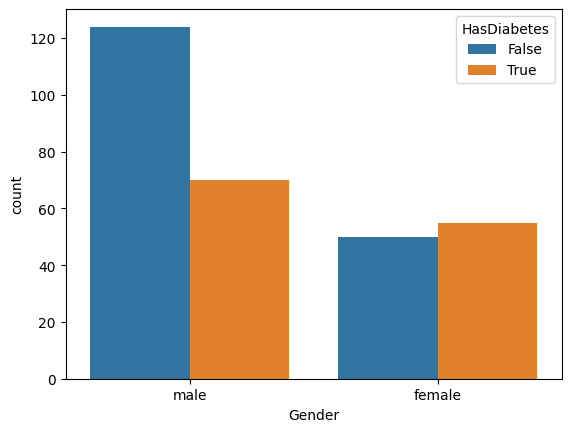

In [125]:
# 1
sns.countplot(x ='Gender', hue = "HasDiabetes", data = data)
plt.show()

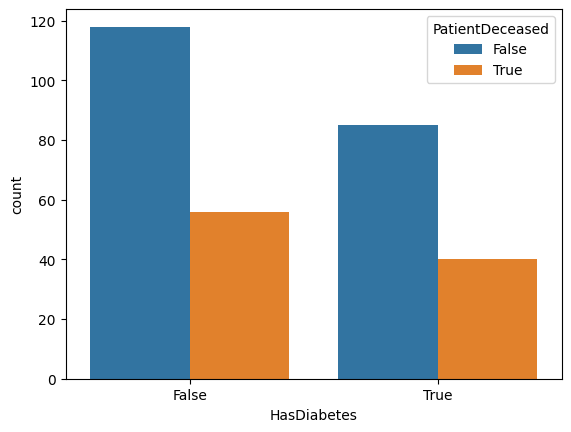

In [54]:
# 2
sns.countplot(x ='HasDiabetes', hue = "PatientDeceased", data = data)
plt.show()

### Porcentaje de sangre que sale del corazón en cada contracción

1. En el caso de las mujeres, el % de sangre que sale del corazón en cada contracción es mayor que en los hombres.
2. Como menor sea el %, mayor es la probabilidad de sufrir un paro cardíaco.

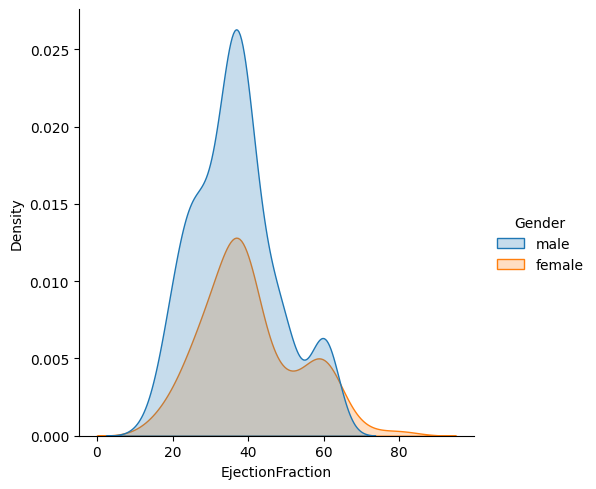

In [55]:
# 1
sns.displot(data, x="EjectionFraction", hue="Gender", kind="kde", fill=True)

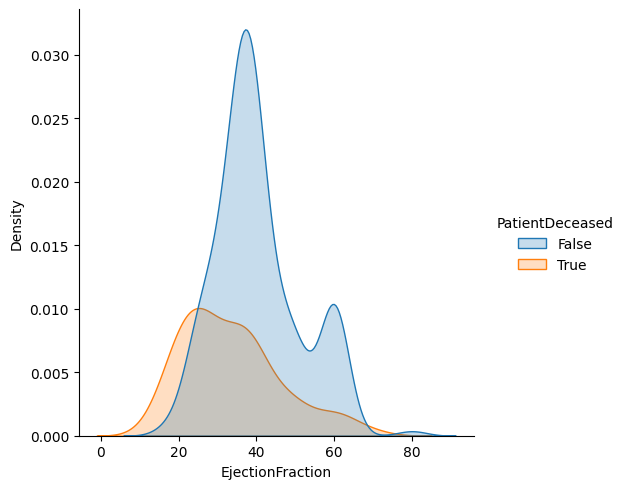

In [57]:
# 2
sns.displot(data, x="EjectionFraction", hue="PatientDeceased", kind="kde", fill=True)

### Pacientes con hipertensión

1. Tanto hombres como mujeres tienen la misma probabilidad de tener hipertensión.
2. Sufrir de hipertensión aumenta el riesgo de padecer de un paro cardíaco.

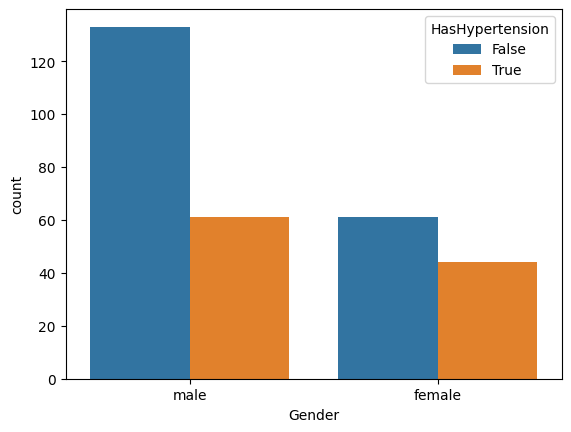

In [22]:
# 1
sns.countplot(x ='Gender', hue = "HasHypertension", data = data)
plt.show()

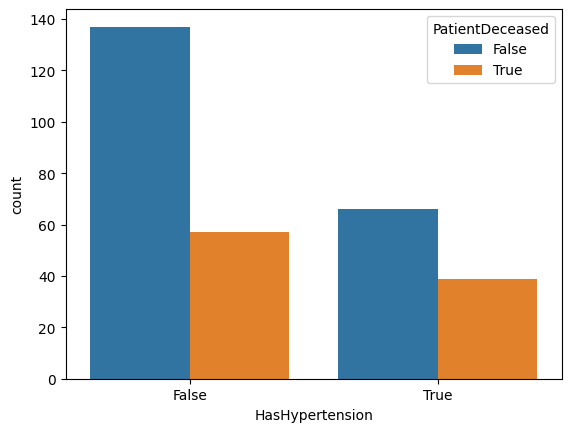

In [62]:
# 2
sns.countplot(x ='HasHypertension', hue = "PatientDeceased", data = data)
plt.show()

### Plaquetas en la sangre

1. EL número de plaquetas en la sangre no es ni mayor ni menor en hombres o mujeres.
2. Niveles bajos de plaquetas en sangre provocan un paro cardíaco.

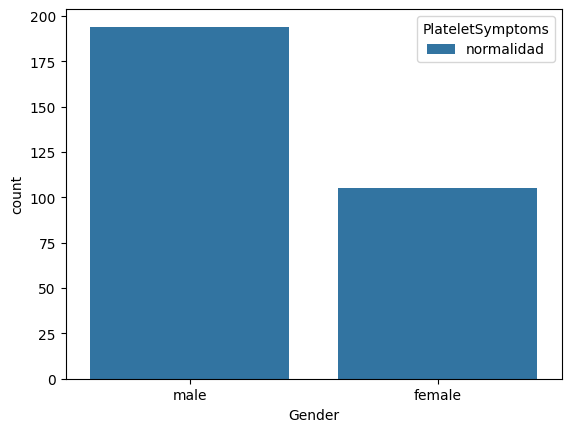

In [23]:
# 1
sns.countplot(x ='Gender', hue = "PlateletSymptoms", data = data)
plt.show()

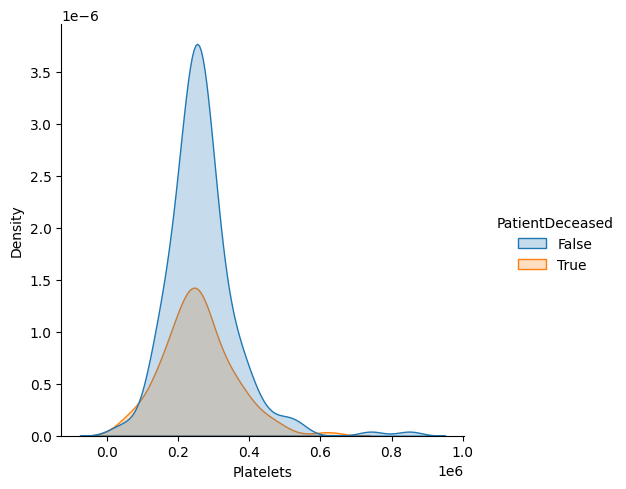

In [64]:
# 3
sns.displot(data, x="Platelets", hue="PatientDeceased", kind="kde", fill=True)

### Nivel de creatinina sérica en sangre

1. Tanto hombres como mujeres tienen la misma probabilidad de tener un fallo renal.
2. Pacientes con un fallo renal tienen mayor riesgo de sufrir un paro cardíaco.

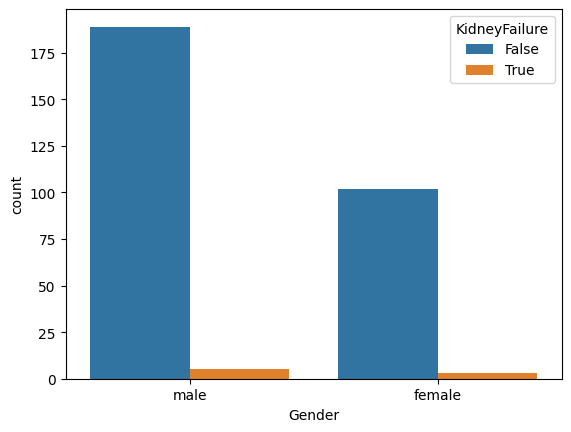

In [22]:
# 1
sns.countplot(x ='Gender', hue = "KidneyFailure", data = data)
plt.show()

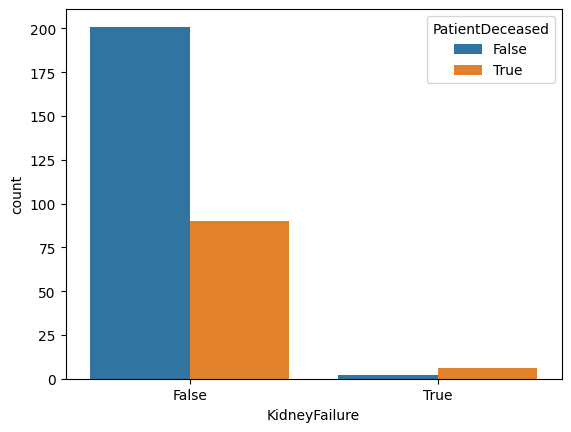

In [23]:
# 2
sns.countplot(x ='KidneyFailure', hue = "PatientDeceased", data = data)
plt.show()

### Nivel de sodio sérico en la sangre

1. El nivel de sodio sérico no es ni mayor ni menor en hombres o mujeres.
2. Niveles muy bajos de sodio sérico aumentan el riesgo de sufrir un paro cardíaco.

### Género

Los hombres tienen mayor probabilidad de sufrir un paro cardíaco.

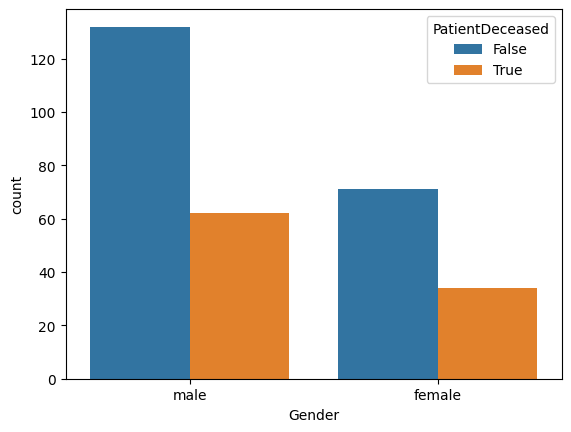

In [65]:
sns.countplot(x ='Gender', hue = "PatientDeceased", data = data)
plt.show()

### Pacientes fumadores

1. Fuman más hombres que mujeres.
2. Fumar aumenta la probabilidad de sufrir un paro cardíaco.

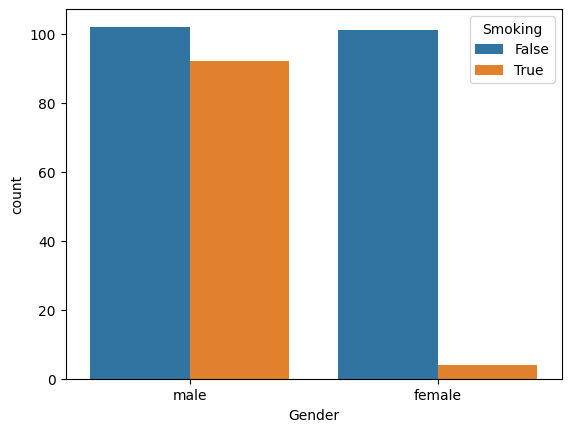

In [66]:
# 1
sns.countplot(x ='Gender', hue = "Smoking", data = data)
plt.show()

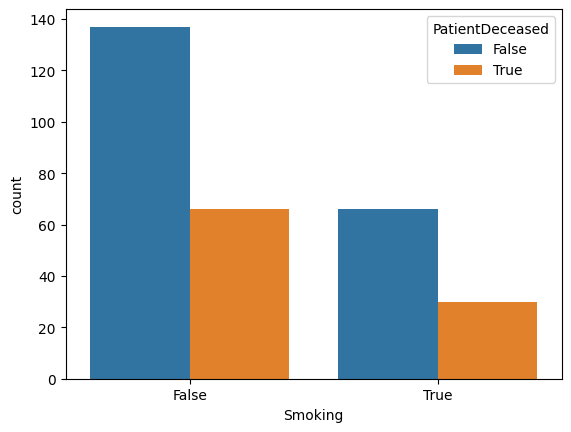

In [129]:
# 2
sns.countplot(x ='Smoking', hue = "PatientDeceased", data = data)
plt.show()

## Análisis multivariante